In [ ]:
#pip install pandas-profiling

In [ ]:
#pip install pycaret[analysis]

In [1]:
from pycaret.datasets import get_data
dataset = get_data('diamond')#, profile=True)

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


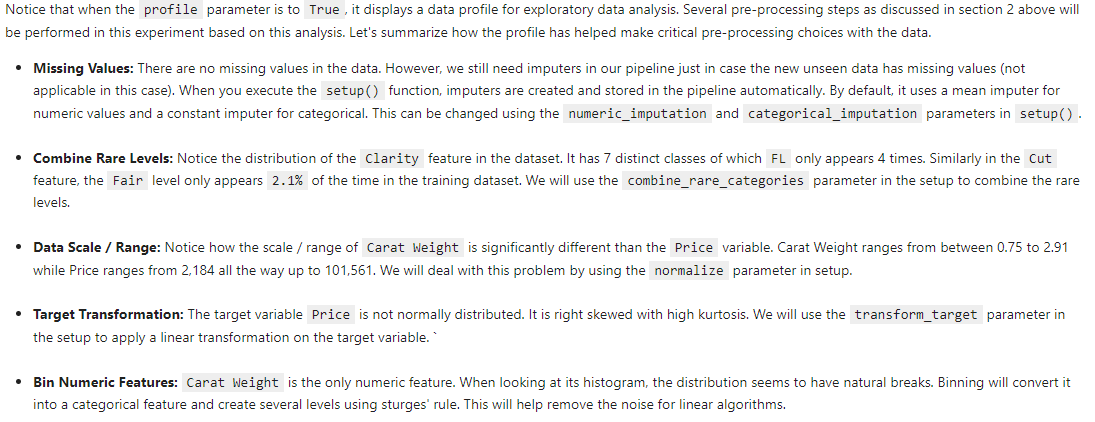

In [2]:
#check the shape of data
dataset.shape

(6000, 8)

In [3]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (5400, 8)
Unseen Data For Predictions (600, 8)


In [4]:
# Setting up Environment in PyCaret

from pycaret.regression import *

In [8]:
#pip install mlflow

In [5]:
s = setup(data=data, target = 'Price', session_id=123, fold_shuffle=True)

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(5400, 8)"
4,Transformed data shape,"(5400, 29)"
5,Transformed train set shape,"(3779, 29)"
6,Transformed test set shape,"(1621, 29)"
7,Ordinal features,1
8,Numeric features,1
9,Categorical features,6


In [ ]:
# Comparing All Models

best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:01:54
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Dummy Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,610.2344,1810276.6637,1293.7235,0.9828,0.0661,0.0484,0.7610
xgboost,Extreme Gradient Boosting,698.7190,2326199.7865,1486.4922,0.9776,0.0741,0.0541,0.3090
et,Extra Trees Regressor,742.8174,2397317.5533,1498.7858,0.9772,0.0825,0.0609,0.3760
rf,Random Forest Regressor,759.7302,2669661.6202,1581.4607,0.9746,0.0829,0.0604,0.3530
lightgbm,Light Gradient Boosting Machine,769.8156,3315705.8928,1742.1813,0.9689,0.0790,0.0572,0.3550
gbr,Gradient Boosting Regressor,908.6844,3254613.3608,1770.3378,0.9686,0.1020,0.0771,0.2400
dt,Decision Tree Regressor,992.1434,4510446.8557,2092.7115,0.9560,0.1084,0.0781,0.1690
lar,Least Angle Regression,2413.8942,14236102.6355,3729.9921,0.8617,0.6626,0.2871,0.1530
lasso,Lasso Regression,2411.8767,14238723.0770,3732.7024,0.8616,0.6714,0.2866,0.1570
llar,Lasso Least Angle Regression,2354.9193,14257010.3762,3733.0159,0.8616,0.6448,0.2728,0.1550


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [22]:
print(top3)

[GradientBoostingRegressor(random_state=123), LGBMRegressor(random_state=123), XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=123,
             reg_alpha=0, reg_lambda=1, ...)]


In [12]:
# Create a Model
# Create Model (with 5 Fold CV)

dt = create_model('dt', fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,968.4202,3727477.1209,1930.6675,0.9586,0.1056,0.0771
1,916.2103,3395301.9961,1842.6345,0.9631,0.1056,0.0777
2,961.8644,4177592.0425,2043.9159,0.9607,0.1135,0.0785
3,1041.6254,4795761.6482,2189.9227,0.9484,0.1103,0.0797
4,1077.3194,5820537.5266,2412.5790,0.9530,0.1096,0.0785
Mean,993.0879,4383334.0669,2083.9439,0.9568,0.1089,0.0783
SD,58.2141,858409.6669,201.2753,0.0053,0.0030,0.0009


In [13]:
# Create Model (Metrics rounded to 2 decimals points)

rf = create_model('rf', round = 2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,851.93,2131516.55,1459.97,0.98,0.09,0.07
1,727.49,1805631.01,1343.74,0.98,0.08,0.06
2,828.42,3273059.72,1809.16,0.97,0.09,0.06
3,714.28,1737884.47,1318.29,0.98,0.08,0.06
4,867.83,2925725.95,1710.48,0.97,0.10,0.07
5,845.59,4552152.91,2133.58,0.96,0.09,0.06
6,878.24,2895391.20,1701.58,0.97,0.09,0.07
7,833.88,2177191.78,1475.53,0.98,0.09,0.07
8,906.99,5575294.32,2361.21,0.96,0.09,0.06
9,986.32,5061431.93,2249.76,0.95,0.10,0.07


In [14]:
# Create Model (KNN)

knn = create_model('knn')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3174.6763,39702489.2909,6300.9911,0.5599,0.3863,0.2370
1,3010.0881,32633486.6470,5712.5727,0.6369,0.3616,0.2520
2,2998.3271,37983757.7569,6163.0964,0.6045,0.3957,0.2645
3,2886.9529,33263139.5442,5767.4205,0.6210,0.3776,0.2692
4,3327.9154,45066712.1311,6713.1745,0.5698,0.3993,0.2672
5,3324.0724,42747311.6773,6538.1428,0.6025,0.3973,0.2440
6,3466.1657,43383275.8514,6586.5982,0.5570,0.3926,0.2506
7,3337.6370,41387844.4971,6433.3385,0.5286,0.4057,0.2623
8,3666.3254,61583709.7617,7847.5289,0.5535,0.3894,0.2436
9,3355.0255,47322614.4430,6879.1434,0.5696,0.3869,0.2368


In [15]:
print(knn)

PowerTransformedTargetRegressor(algorithm='auto', leaf_size=30,
                                metric='minkowski', metric_params=None,
                                n_jobs=-1, n_neighbors=5, p=2,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                regressor=KNeighborsRegressor(algorithm='auto',
                                                              leaf_size=30,
                                                              metric='minkowski',
                                                              metric_params=None,
                                                              n_jobs=-1,
                                                              n_neighbors=5,
                                                              p=2,
                                                              weights='uniform'),
                                weights='unifo

In [16]:
# Tune a Model

tuned_knn = tune_model(knn)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2333.0003,32813292.0909,5728.2888,0.6362,0.3017,0.1523
1,2234.0066,26937543.4065,5190.1391,0.7003,0.2921,0.1759
2,2447.5416,33969869.3426,5828.3676,0.6463,0.3287,0.1854
3,2028.0556,25343311.7889,5034.2141,0.7112,0.3028,0.1691
4,2283.4503,32191412.3339,5673.7476,0.6927,0.3180,0.1821
5,2659.7568,38265463.5817,6185.9085,0.6442,0.3455,0.1841
6,2532.0556,33168759.4139,5759.2325,0.6613,0.3221,0.1756
7,2412.8729,29126112.7442,5396.8614,0.6683,0.3300,0.1791
8,2810.7409,46513804.4901,6820.1030,0.6628,0.3372,0.1753
9,2546.1299,39685819.9779,6299.6682,0.6391,0.3208,0.1651


Here we will introduce the the n_iter parameter in tune_model(). n_iter is the number of iterations within a random 
grid search. For every iteration, the model randomly selects one value from a pre-defined grid of hyperparameters. 
By default, the parameter is set to 10 which means there would be a maximum of 10 iterations to find the best value for 
hyperparameters. Increasing the value may improve the performance but will also increase the training time. 

In [17]:
tuned_knn2 = tune_model(knn, n_iter = 50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2317.6508,31359504.1582,5599.9557,0.6523,0.3239,0.1705
1,2270.4107,24064073.9184,4905.5146,0.7323,0.3178,0.1965
2,2481.3387,33509155.3013,5788.7093,0.6511,0.3507,0.1909
3,2287.9987,27713971.1219,5264.4061,0.6842,0.3587,0.2203
4,2198.4716,29608228.9668,5441.3444,0.7173,0.3058,0.1790
5,2451.1993,30742924.2205,5544.6302,0.7141,0.3662,0.2021
6,2559.8857,30985151.9331,5566.4308,0.6836,0.3384,0.1991
7,2494.5447,28281768.0019,5318.0605,0.6779,0.3429,0.1941
8,2812.4391,44960071.6123,6705.2272,0.6740,0.3636,0.2076
9,2627.7716,35646154.7123,5970.4401,0.6758,0.3575,0.1965


Notice how two tuned K Nearest Neighbors were created based on the n_iter parameter. In tuned_knn, the n_iter parameter is left to the default value and resulted in R2 of 0.6504. In tuned_knn2, the n_iter parameter was set to 50 and the R2 improved to 0.6689. Observe the differences between the hyperparameters of tuned_knn and tuned_knn2 below:

In [18]:
plot_model(tuned_knn, plot = 'parameter')

,Parameters
algorithm,auto
leaf_size,30
metric,minkowski
metric_params,None
n_jobs,-1
n_neighbors,9
p,2
weights,distance
power_transformer_method,box-cox
power_transformer_standardize,True


In [19]:
plot_model(tuned_knn2, plot = 'parameter')

,Parameters
algorithm,auto
leaf_size,30
metric,manhattan
metric_params,None
n_jobs,-1
n_neighbors,3
p,2
weights,distance
power_transformer_method,box-cox
power_transformer_standardize,True


Ensembling is a common machine learning technique used to improve the performance of models (mostly tree based). There are various techniques for ensembling that we will cover in this section. These include Bagging and Boosting (Read More). We will use the ensemble_model() function in PyCaret which ensembles the trained base estimators using the method defined in the method parameter.

In [20]:
# Ensemble a model

In [21]:
# lets create a simple dt
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1001.7448,3443714.8007,1855.7249,0.9618,0.1095,0.0804
1,931.0755,5556376.7504,2357.1968,0.9382,0.1037,0.0761
2,1051.4569,5314816.6453,2305.3886,0.9447,0.1152,0.0822
3,815.9983,2020114.8272,1421.3074,0.9770,0.1054,0.0773
4,998.5197,3880553.6255,1969.9121,0.9630,0.1125,0.0805
5,962.7059,4827085.6020,2197.0629,0.9551,0.1056,0.0731
6,1053.0536,6567322.4822,2562.6788,0.9329,0.1118,0.0797
7,969.4786,3081530.5813,1755.4289,0.9649,0.1036,0.0780
8,1111.2474,7212039.0735,2685.5240,0.9477,0.1107,0.0775
9,1083.8186,5099121.4227,2258.1234,0.9536,0.1125,0.0795


In [22]:
#Bagging

bagged_dt = ensemble_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,889.2245,2594154.3134,1610.6379,0.9712,0.0985,0.0719
1,704.8581,1586995.4990,1259.7601,0.9823,0.0840,0.0622
2,851.6300,3315498.0220,1820.8509,0.9655,0.0889,0.0647
3,737.5222,1854389.7835,1361.7598,0.9789,0.0874,0.0653
4,900.8250,3511421.5470,1873.8787,0.9665,0.0990,0.0692
5,845.2386,3467374.9230,1862.0889,0.9678,0.0928,0.0644
6,922.1444,4300854.7628,2073.8502,0.9561,0.0970,0.0709
7,895.9817,2518119.1226,1586.8583,0.9713,0.0922,0.0701
8,994.7037,7196189.0228,2682.5713,0.9478,0.0987,0.0681
9,1033.4852,5668102.9007,2380.7778,0.9484,0.1077,0.0749


In [23]:
# check the parameter of bagged_dt

print(bagged_dt)

PowerTransformedTargetRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                     criterion='squared_error',
                                                                     max_depth=None,
                                                                     max_features=None,
                                                                     max_leaf_nodes=None,
                                                                     min_impurity_decrease=0.0,
                                                                     min_samples_leaf=1,
                                                                     min_samples_split=2,
                                                                     min_weight_fraction_leaf=0.0,
                                                                     random_state=123,
                                                                     splitter='best'),
         

Notice how ensembling has improved the RMSLE from 0.1082 to 0.0938. In the above example we have used the default parameters of ensemble_model() which uses the Bagging method. Let's try Boosting by changing the method parameter in ensemble_model()

In [24]:
# Boosting

boosted_dt = ensemble_model(dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,891.3429,2247979.9956,1499.3265,0.9751,0.1041,0.0753
1,759.8857,1899915.3879,1378.3742,0.9789,0.0883,0.0661
2,905.6923,4062457.1793,2015.5538,0.9577,0.0974,0.0675
3,746.2552,1718333.5050,1310.8522,0.9804,0.0923,0.0689
4,930.7988,2885443.7345,1698.6594,0.9725,0.1098,0.0784
5,915.4032,4607261.1534,2146.4532,0.9572,0.0990,0.0680
6,1011.4442,5580404.8392,2362.2881,0.9430,0.1010,0.0753
7,933.1666,2959364.4093,1720.2803,0.9663,0.1002,0.0739
8,1105.0940,8607267.1807,2933.8144,0.9376,0.1169,0.0767
9,1003.6991,4678932.0356,2163.0839,0.9574,0.1061,0.0744


Notice how easy it is to ensemble models in PyCaret. By simply changing the method parameter you can do bagging or boosting which would otherwise have taken multiple lines of code. Note that ensemble_model() will by default build 10 estimators. This can be changed using the n_estimators parameter. Increasing the number of estimators can sometimes improve results.

In [25]:
bagged_dt2 = ensemble_model(dt, n_estimators=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,881.3964,2447728.8161,1564.5219,0.9729,0.0962,0.0712
1,723.4142,1825400.4910,1351.0738,0.9797,0.0848,0.0629
2,830.7885,3250067.9969,1802.7945,0.9662,0.0871,0.0636
3,727.2040,1833529.1586,1354.0787,0.9791,0.0858,0.0639
4,876.2076,3056109.8830,1748.1733,0.9708,0.0955,0.0683
5,838.9919,4347855.3047,2085.1511,0.9596,0.0914,0.0629
6,891.4040,3224528.7990,1795.6973,0.9671,0.0938,0.0698
7,845.0621,2301749.2767,1517.1517,0.9738,0.0882,0.0667
8,924.6756,5837957.8303,2416.1866,0.9577,0.0924,0.0655
9,976.5979,4579059.3213,2139.8737,0.9584,0.1011,0.0721


Notice how increasing the n_estimators parameter has improved the result. The bagged_dt model with the default 10 estimators resulted in a RMSLE of 0.0996 whereas in bagged_dt2 where n_estimators = 50 the RMSLE improved to 0.0911.

In [26]:
# Blending

Blending is another common technique for ensembling that can be used in PyCaret. It creates multiple models and then averages the individual predictions to form a final prediction.

In [27]:
# train individual models to blend

lightgbm = create_model('lightgbm', verbose = False)
dt = create_model('dt', verbose = False)
lr = create_model('lr', verbose = False)

In [28]:
# blend individual models

blender = blend_models(estimator_list = [lightgbm, dt, lr])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,758.6140,2111474.1808,1453.0912,0.9766,0.0830,0.0603
1,715.7719,1825660.2504,1351.1700,0.9797,0.0786,0.0585
2,662.9705,1573445.4097,1254.3705,0.9836,0.0728,0.0557
3,679.2650,1653675.8505,1285.9533,0.9812,0.0805,0.0589
4,763.5385,2216598.5800,1488.8246,0.9788,0.0807,0.0600
5,770.5598,3245369.6641,1801.4910,0.9698,0.0838,0.0584
6,812.5989,3376008.6414,1837.3918,0.9655,0.0834,0.0621
7,759.1051,1864541.0236,1365.4820,0.9788,0.0788,0.0603
8,809.5325,3489322.7637,1867.9729,0.9747,0.0774,0.0565
9,906.3698,3017883.5676,1737.2057,0.9726,0.0896,0.0654


In [29]:
# blend top3 models from compare_models

blender_top3 = blend_models(top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,734.2669,2043695.9862,1429.5790,0.9773,0.0773,0.0565
1,655.8904,1478725.0934,1216.0284,0.9835,0.0745,0.0554
2,594.7692,1168516.2083,1080.9793,0.9878,0.0647,0.0495
3,634.0927,1598891.3572,1264.4728,0.9818,0.0726,0.0537
4,746.5219,2254298.8238,1501.4323,0.9785,0.0774,0.0574
5,734.4614,4301027.3517,2073.8918,0.9600,0.0807,0.0534
6,775.2173,3142146.7645,1772.6102,0.9679,0.0780,0.0589
7,674.7023,1910831.3538,1382.3282,0.9782,0.0714,0.0533
8,748.3904,3262498.6304,1806.2388,0.9763,0.0723,0.0527
9,786.7417,2193914.3979,1481.1868,0.9800,0.0818,0.0599


In [30]:
print(blender_top3.estimators_)

[<catboost.core.CatBoostRegressor object at 0x000001C19A2028B0>, XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=123, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='auto',
             validate_parameters=1, verbosity=0), LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_

Now that we have created a VotingRegressor using the blend_models() function. The model returned by the blend_models function is just like any other model that you would create using create_model() or tune_model(). You can use this model for predictions on unseen data using predict_model() in the same way you would for any other model.

In [31]:
# Stacking

Stacking is another popular technique for ensembling but is less commonly implemented due to practical difficulties. Stacking is an ensemble learning technique that combines multiple models via a meta-model. Another way to think about stacking is that multiple models are trained to predict the outcome and a meta-model is created that uses the predictions from those models as an input along with the original features. The implementation of stack_models() is based on Wolpert, D. H. (1992b). Stacked generalization.

https://www.sciencedirect.com/science/article/abs/pii/S0893608005800231

In [32]:
# Let's see an example below using the top 3 models we have obtained from compare_models:

stacker = stack_models(top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,747.8656,2464132.2626,1569.7555,0.9727,0.0772,0.0561
1,672.2809,1522766.1287,1234.0041,0.9831,0.0739,0.0551
2,549.2668,911007.7333,954.4673,0.9905,0.0622,0.0477
3,627.9570,1567507.0335,1252.0012,0.9821,0.0733,0.0536
4,697.1186,1855655.8298,1362.2246,0.9823,0.0751,0.0551
5,790.5501,9040776.9765,3006.7885,0.9159,0.0811,0.0542
6,792.5227,4078100.1626,2019.4307,0.9584,0.0781,0.0584
7,691.4564,1783417.0668,1335.4464,0.9797,0.0718,0.0539
8,751.3841,2532026.3189,1591.2342,0.9816,0.0708,0.0532
9,792.9674,2120838.3512,1456.3098,0.9807,0.0814,0.0600


By default, the meta model (final model to generate predictions) is Linear Regression. The meta model can be changed using the meta_model parameter. See an example below:

In [33]:
xgboost = create_model('xgboost')
stacker2 = stack_models(top3, meta_model = xgboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,784.2491,2638421.7500,1624.3219,0.9708,0.0805,0.0608
1,696.5787,2029539.8750,1424.6193,0.9774,0.0800,0.0588
2,674.7789,1903072.5000,1379.5189,0.9802,0.0705,0.0544
3,704.5421,2075759.8750,1440.7498,0.9763,0.0818,0.0588
4,808.8419,2507697.0000,1583.5709,0.9761,0.0857,0.0630
5,755.6437,2677102.0000,1636.1852,0.9751,0.0828,0.0570
6,848.2363,3646974.7500,1909.7054,0.9628,0.0854,0.0650
7,744.3414,1740071.1250,1319.1176,0.9802,0.0781,0.0597
8,846.4321,4877697.5000,2208.5510,0.9646,0.0796,0.0585
9,827.1507,2557633.7500,1599.2604,0.9767,0.0831,0.0622


Before we wrap up this section, there is another parameter in stack_models() that we haven't seen yet called restack. This parameter controls the ability to expose the raw data to the meta model. When set to True, it exposes the raw data to the meta model along with all the predictions of the base level models. By default it is set to True. See the example below with the restack parameter changed to False.

#### Experiment Logging

PyCaret 2.0 embeds MLflow Tracking component as a backend API and UI for logging parameters, code versions, metrics, and output files when running your machine learning code and for later visualizing the results. To log your experiments in pycaret simply use log_experiment and experiment_name parameter in the setup function, as we did in this example.

In [ ]:
# to start the MLFlow server from notebook:
!mlflow ui

# Open localhost:5000 on your browser

below is example of how UI looks like

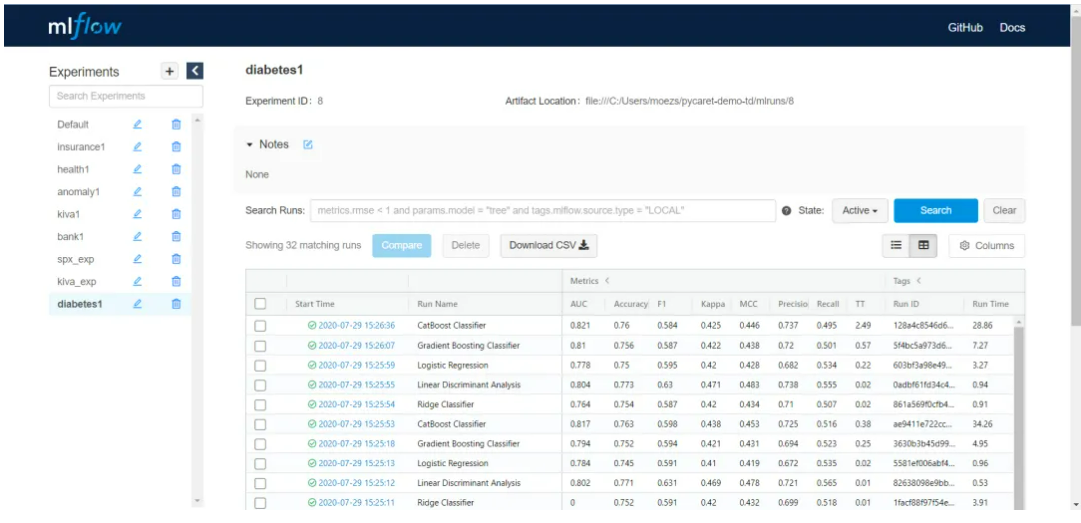

In [1]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [4]:
sns.set_style('darkgrid')
colors = ['#851836', '#EDBD17', '#0E1428', '#407076', '#4C5B61']
sns.set_palette(sns.color_palette(colors))

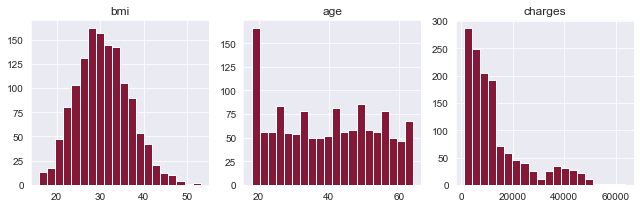

In [5]:
numerical = ['bmi', 'age', 'charges']
data[numerical].hist(bins=20, layout=(1, 3), figsize=(9,3))

plt.tight_layout()
plt.show()

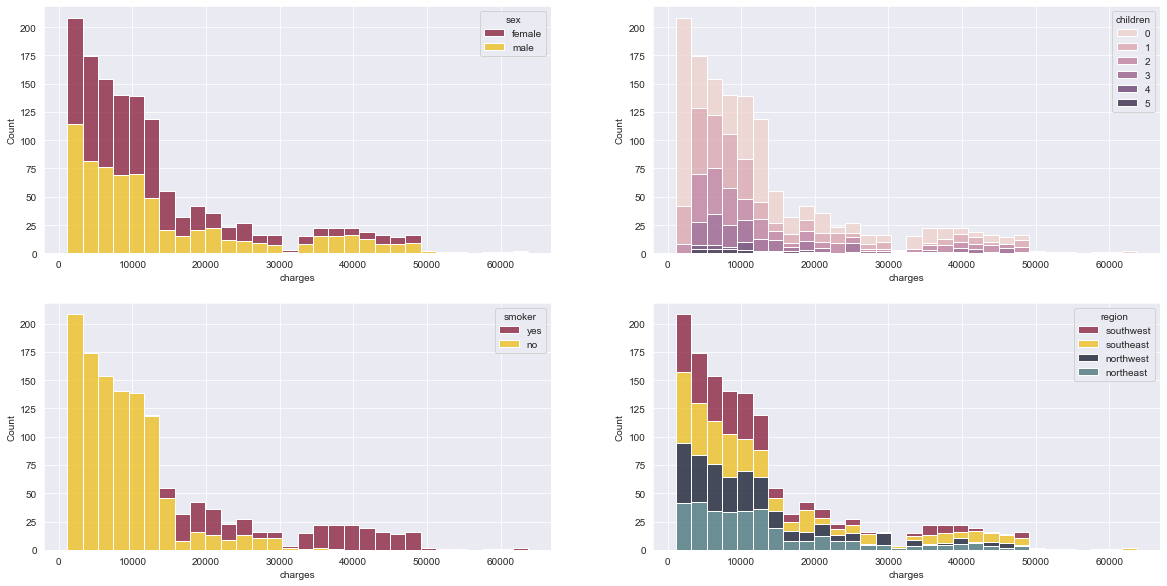

In [6]:
categorical = ['sex', 'children', 'smoker', 'region']

fig, axs = plt.subplots(2, 2, figsize=(20,10))

for variable, ax in zip(categorical, axs.flatten()):
  sns.histplot(data, x='charges', hue=variable, multiple='stack', ax=ax)

In [8]:
from pycaret.regression import *

reg = setup(
    data=data, 
    target='charges', 
    train_size=0.8, 
    session_id=10,
    normalize=True, 
    transform_target=True, fold_shuffle=True)

,Description,Value
0,session_id,10
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1070, 14)"


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

Viewing the pre-processed data

The get_config('X') function returns the features dataset after the pre-processing pipeline has been applied to it:

In [9]:
get_config('X')

,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.423959,-0.457049,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.494665,0.498336,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.787608,0.373013,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.434080,-1.302572,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,-0.504786,-0.297547,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.767917,0.042616,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1334,-1.494665,0.197235,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1335,-1.494665,0.999627,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1336,-1.282548,-0.798839,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [10]:
best = compare_models(sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2039.6241,20205073.9051,4415.4211,0.8612,0.3522,0.1594,0.0180
rf,Random Forest Regressor,2139.1066,20873574.2472,4497.1686,0.8562,0.3773,0.1849,0.0540
lightgbm,Light Gradient Boosting Machine,2327.2831,21271869.2094,4552.2319,0.8534,0.3762,0.1924,0.1170
catboost,CatBoost Regressor,2275.4573,22343698.0381,4657.8610,0.8457,0.3727,0.1783,0.2750
ada,AdaBoost Regressor,3124.6986,22582044.6439,4708.4236,0.8443,0.4624,0.4098,0.0080
et,Extra Trees Regressor,2225.0788,23719052.2161,4820.6007,0.8371,0.4065,0.2002,0.0560
xgboost,Extreme Gradient Boosting,2710.4488,30058026.0000,5314.8309,0.7843,0.4030,0.2186,0.0580
dt,Decision Tree Regressor,2791.8777,37963813.5398,6131.3868,0.7390,0.4949,0.3151,0.0050
omp,Orthogonal Matching Pursuit,5697.6234,59742426.4110,7701.0551,0.5902,0.6865,0.6899,0.0040
ridge,Ridge Regression,4079.6570,63428520.4000,7875.2640,0.5733,0.4252,0.2612,0.0040


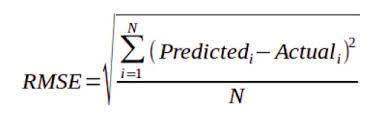

### Creating a model with PyCaret

The create_model() function lets you create a regression model based on the algorithm of your preference. In this case, we'll use Gradient Boosting Regressor since it had the best performance from compare_models() above.

The create_model() function uses k-fold cross-validation to evaluate the model accuracy. In this method, the dataset is first partitioned into  subsamples, one subsample is retained for validation, and the rest is used to train the model. This process is repeated  times, and each subsample is used only once as validation data.

In [11]:
model = create_model('gbr', cross_validation=True, fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1332.8337,7315085.9576,2704.6416,0.9482,0.2814,0.1496
1,2012.0897,20652220.7959,4544.4715,0.8408,0.3808,0.1567
2,2829.0329,34856045.8231,5903.9009,0.7634,0.5247,0.1884
3,2515.1486,26966027.2205,5192.8824,0.7974,0.3925,0.1826
4,1593.1894,13775624.8896,3711.5529,0.9096,0.2467,0.1302
5,1764.2679,17611337.0229,4196.5864,0.9050,0.3145,0.1500
6,1816.8864,15268450.9874,3907.4865,0.8678,0.2587,0.1493
7,2067.3715,18045771.3068,4248.0315,0.8917,0.3062,0.1635
8,2138.0137,21818954.9681,4671.0764,0.8436,0.4716,0.1599
9,2327.4069,25741220.0787,5073.5806,0.8440,0.3448,0.1641


### Tuning a Model

The tune_model() function tunes the hyperparameters of a given model and outputs the results. Hyperparameters are model settings that can be modified and can have either a positive or negative effect in their accuracy.

tune_model() uses the Random Grid Search method to tune and optimize the model by testing a random sample of the hyperparameters. We can define a grid with specific values for the hyperparameters by using the custom_grid parameter.

We can also define the number of iterations with the n_iter parameter. A random value from the defined grid of hyperparameters is selected for every iteration and tested using k-fold cross-validation.

In [12]:
params = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [5, 6, 7, 8],
    'subsample': [0.6, 0.7, 0.8],
    'n_estimators' : [100, 300, 400, 500]
}

tuned_model = tune_model(
    model, 
    optimize='RMSE',
    fold=10,
    custom_grid=params, 
    n_iter=20)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1385.9516,7296576.7200,2701.2176,0.9484,0.2914,0.1670
1,2012.8946,21668520.3685,4654.9458,0.8330,0.3823,0.1625
2,2534.8767,32005422.4122,5657.3335,0.7828,0.5277,0.1926
3,2706.7102,28401533.1846,5329.3089,0.7866,0.3995,0.2075
4,1650.4391,15655638.3436,3956.7207,0.8973,0.2639,0.1434
5,1876.2724,18435787.8239,4293.6916,0.9005,0.3307,0.1759
6,1736.6696,15027773.1189,3876.5672,0.8699,0.2522,0.1465
7,1860.8849,15851370.1388,3981.3779,0.9049,0.2974,0.1560
8,2169.6810,22260524.8941,4718.1061,0.8404,0.4819,0.1668
9,2378.0623,26174875.2579,5116.1387,0.8413,0.3568,0.1768


As we can see from the cross-validation results, the hyperparameter tuning slightly increased the model's accuracy. The improvement is small, but experimenting with a higher iteration number or a grid with different hyperparameter values may lead to better results.

### Plotting the Model Performance

PyCaret includes a plot_model() function that lets us visualize our model's accuracy and other properties. The function includes a variety of plots that help us evaluate and understand our model better. Compared to the underlying libraries used to generate these plots — sklearn, pandas, and matplotlib — using PyCaret is significantly quicker and simpler to work with.

First, we'll plot the error of the predictions on the test set:

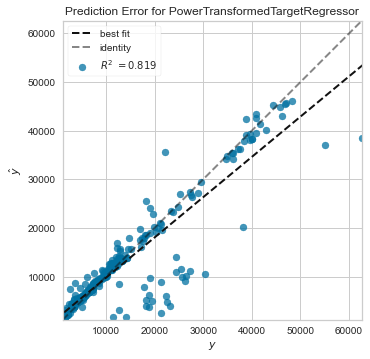

In [13]:
plot_model(tuned_model, plot='error')

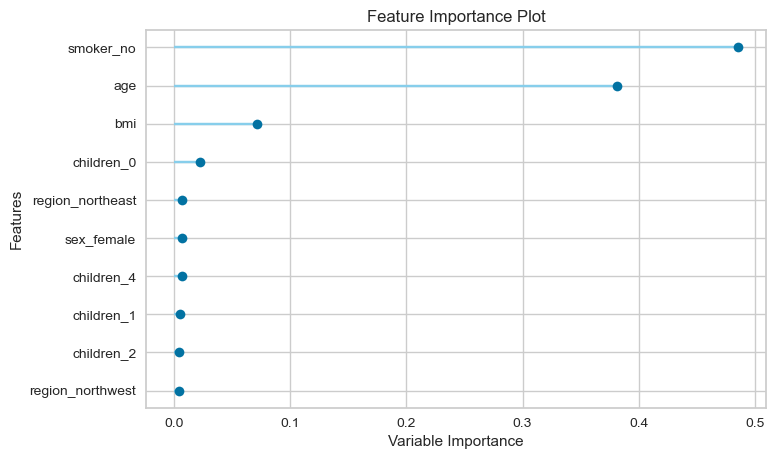

In [14]:
# Second, we'll plot the importance of each feature:

plot_model(tuned_model, plot='feature')

In the EDA section above, we saw that being a smoker leads to significantly higher insurance charges, and now from the feature importance chart we see that being a smoker has the highest predictive value. Furthermore, we can also see that age and BMI seem to play an important role as well.

### Making Predictions on New Data

Every real-world machine learning project's ultimate goal is to make predictions on new data, where the target variable is unknown. You can accomplish that by using the predict_model() function, which returns a pandas dataframe with predictions.

We are going to create a small synthetic dataset and test our model and see how it predicts insurance charges:

In [15]:
cols =  ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

records = [
       [30, 'male', 20, 0, 'no', 'southeast'],
       [30, 'male', 20, 0, 'yes', 'southeast'],
       [30, 'male', 35, 0, 'yes', 'southeast'],
       [70, 'male', 35, 0, 'yes', 'southeast'],
       [30, 'female', 20, 0, 'no', 'southeast'],
       [30, 'female', 20, 0, 'yes', 'southeast'],
       [30, 'female', 35, 0, 'yes', 'southeast'],
       [70, 'female', 35, 0, 'yes', 'southeast'] 
]

new_data = pd.DataFrame(data=records, columns=cols)

predict_model(tuned_model, new_data)

,age,sex,bmi,children,smoker,region,Label
0,30,male,20,0,no,southeast,4255.796016
1,30,male,20,0,yes,southeast,16971.883429
2,30,male,35,0,yes,southeast,35783.173694
3,70,male,35,0,yes,southeast,45759.191339
4,30,female,20,0,no,southeast,4748.692404
5,30,female,20,0,yes,southeast,17184.482149
6,30,female,35,0,yes,southeast,35852.426791
7,70,female,35,0,yes,southeast,45834.814931


We can see that young non-smokers with a low BMI are predicted to have the lowest charges by our model. On the other hand, those who are older, obese, and smoke are predicted to be charged ten times as much. Those results are in line with the EDA and the feature importance plot.

### Interpreting the Model

The ability to interpret a machine learning model's results allows you to avoid relying on a "black box model," where you don't understand how it exactly works.

PyCaret includes the interpret_model() function that provides an interpretation plot for a given model. This function requires the SHAP (SHapley Additive exPlanations) library to work, so we'll have to install it first.

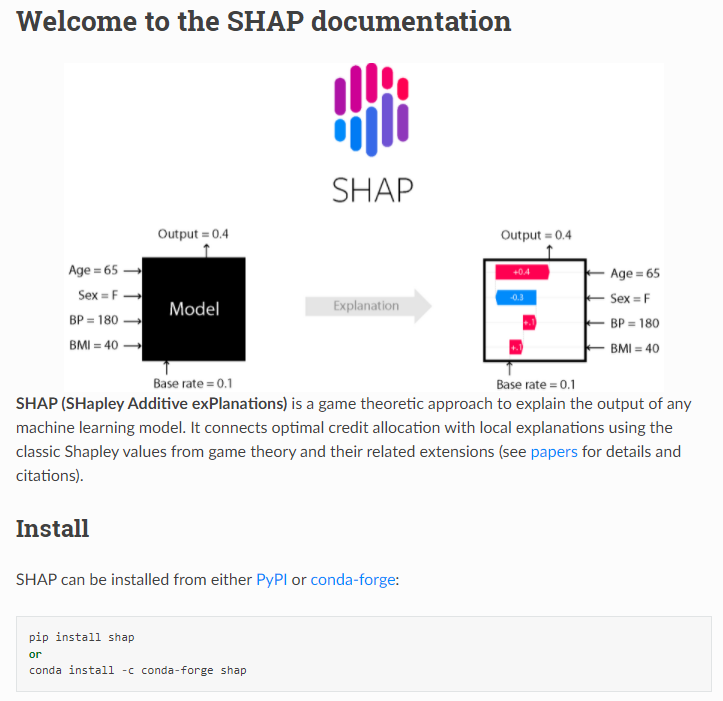

In [16]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


After installing the SHAP library, we can create an interpretation plot for our model. The Gradient Boosting Regressor isn't supported by the interpret_model() function, so we will create another model based on the XGBoost algorithm and interpret that model instead.

To interpret the model, we'll use the "reason" plot type:

In [17]:
xgb = create_model('xgboost', cross_validation=True, verbose=False)

interpret_model(xgb, plot='reason', observation=32)

Above the plot, you'll notice the "base value," which is defined as the mean predicted target, and f(x), which is the prediction for a selected observation. The red-colored features increased the predicted value, while the blue-colored features decreased it.

The size of each feature indicates the impact it has on the model. In this case, not being a smoker and having zero children had a positive effect, and as a result, decreased the predicted insurance charges below the mean value.

### Conclusion

We have pre-processed our data, compared a variety of regression models, and tuned the model of our preference, all in a few lines of code. Using scikit-learn for regression is, of course, an option, but the time and effort required are significantly higher. PyCaret lets us create machine learning models quickly and easily, making it an ideal choice for beginners. Furthermore, PyCaret can also be used by experienced data scientists who want to reduce the time needed to complete machine learning projects.